In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
OWNER_NAME = "Mariia Turchina"
PASSWORD = "bridport20"

In [3]:
class EntryDivider:
    
    def __init__(self, df):
        self.df = df
        self.nr_entries = self.df["entry"].max() + 1
        self.entries = self.divide_entries()
        
    def divide_entries(self):
        entries = []
        for entry_i in range(self.nr_entries):
            curr_entry = self.df[self.df["entry"] == entry_i]
            curr_entry = self.reset_time(curr_entry.sort_values(by = ["time"]).reset_index(drop = True))
            entries.append(curr_entry)
            
        return entries
    
    def reset_time(self, entry_df):
        start_time = entry_df["time"].min()
        entry_df["time"] -= start_time
        
        return entry_df

In [4]:
class Entry:
    
    def __init__(self, name, entry):
        self.is_owner = name == OWNER_NAME
        self.data = entry

In [15]:
class EntriesData:
    
    def __init__(self, entries: [Entry]):
        self.entries = entries
        
    def plot_event_times(self, event):
        fig, ax = plt.subplots(figsize = (15, 15))
        xval = 0
        temp_entries = self.entries
        
        for key_char in PASSWORD:
            times = []
            for i in range(len(temp_entries)):
                entry = temp_entries[i].data
                time = entry[(entry["key_char"] == key_char) & (entry["event"] == event)]["time"].iloc[0]
                temp_entries[i].data = entry[entry["time"] != time]
                times.append(time)
                
            ax.scatter(np.linspace(xval, xval, len(times)), times, label = key_char)
            ax.legend()
            xval += 1
        
        ax.set_title("{}'s of each entry of each individual".format(event))
            

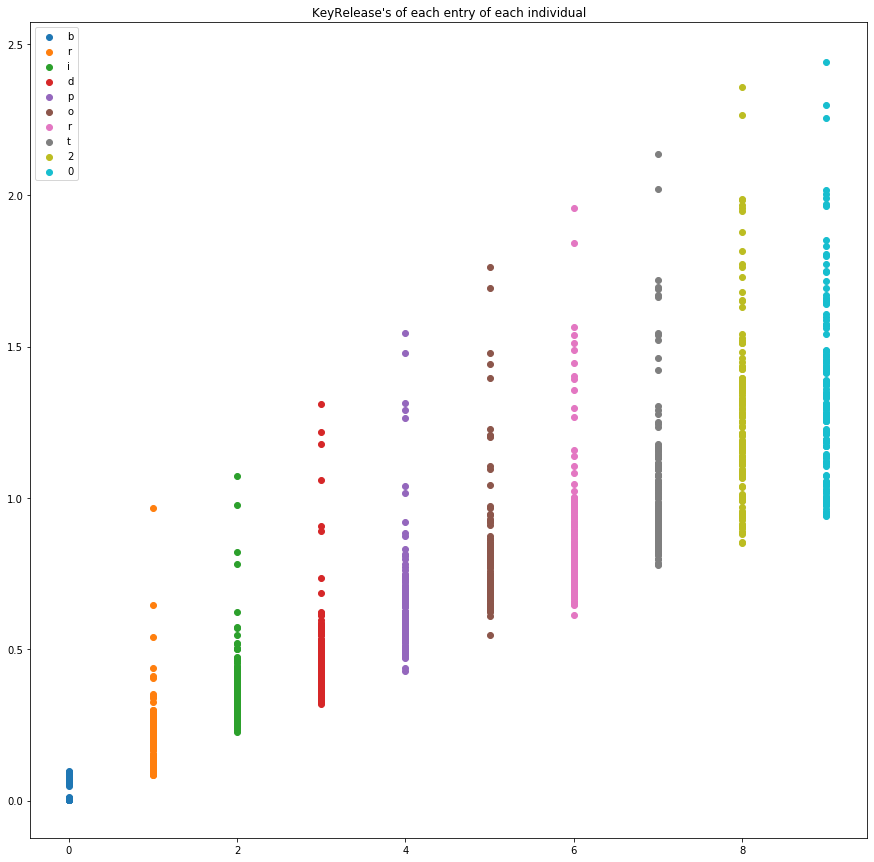

In [16]:
names = []
names.append("Mariia Turchina")
names.append("Sander Steeghs")
names.append("Finn Devlin")

def generate_entries():
    all_entries = []
    
    for name in names:
        name_entries = EntryDivider(pd.read_excel(name + ".xlsx", encoding = "utf8")).entries
        
        for name_entry in name_entries:
            entry = Entry(name, name_entry)
            all_entries.append(entry)
            
    return all_entries

entries_data = EntriesData(generate_entries())
entries_data.plot_event_times("KeyRelease")